***Audio Classification***

In [2]:
pip install --upgrade librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install soundfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 2CD7-88B3

 Directory of C:\Users\KIIT\AI\Deep_learning

10-02-2025  12:39    <DIR>          .
08-02-2025  11:30    <DIR>          ..
22-08-2024  22:18    <DIR>          .ipynb_checkpoints
10-02-2025  12:13    <DIR>          .virtual_documents
29-07-2024  10:12            13,900 AAPL.csv
04-07-2024  03:48            43,935 ANN.ipynb
30-07-2024  00:19             1,822 app.py
10-02-2025  12:39           550,091 Audio_classification.ipynb
30-07-2024  00:00             1,220 base.html
07-07-2024  01:39            65,153 cat_or_dog_1.jpg
07-07-2024  01:39            56,039 cat_or_dog_2.jpg
16-06-2024  04:12           684,858 Churn_Modelling.csv
13-08-2024  23:22            99,690 CNN(SVM).ipynb
28-07-2024  23:51         2,453,672 converted_keras.zip
16-06-2024  01:27       150,828,752 creditcard.csv
08-07-2024  01:49    <DIR>          dataset
11-08-2024  17:17    <DIR>          Datasets
07-07-2024  01:58             2,353 Data_Augm

**EDA**

In [7]:
filename='UrbanSound8K/dog_bark.wav'

In [8]:
#Help us to display graph of audio
import IPython.display as ipd
import librosa
import librosa.display

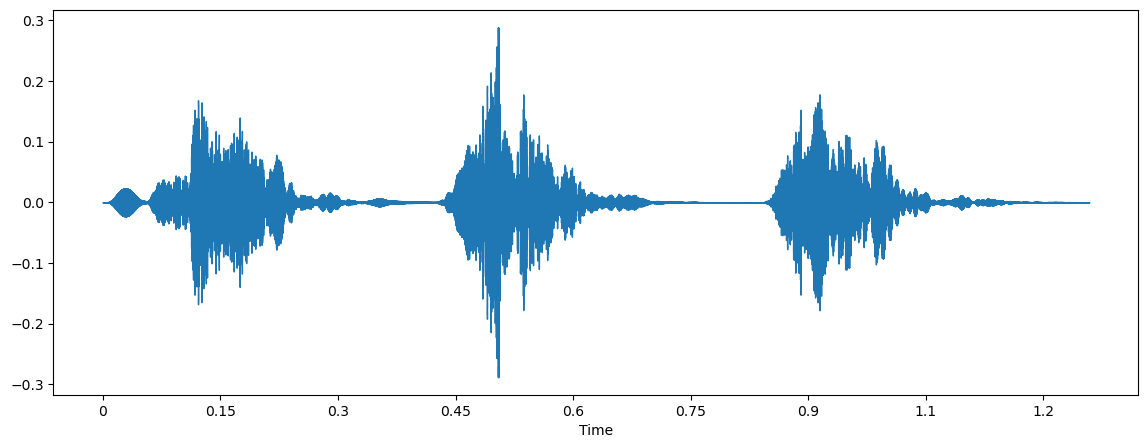

In [9]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename) #Data is  being normalized between 0-1
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [10]:
sample_rate

22050

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename) #Wave_audio not getting normalized

In [12]:
wave_sample_rate

44100

In [13]:
wave_audio #not getting normalized

array([[-115712, -176896],
       [ 115712,  177152],
       [-115968, -177152],
       ...,
       [ 168704,  -57600],
       [ -35584,  128512],
       [ 176128,  -98816]])

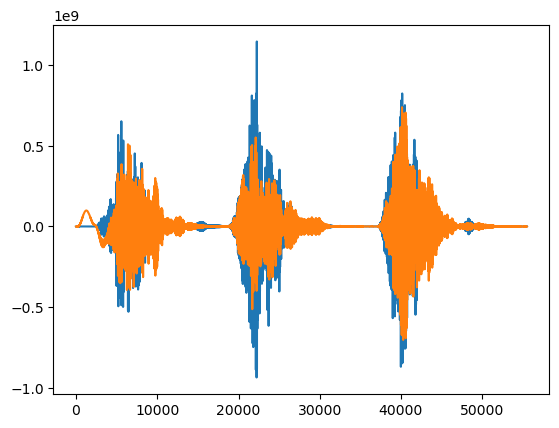

In [14]:
plt.plot(wave_audio)

In [15]:
data

array([-1.6291626e-05,  3.8780272e-06, -1.7443672e-06, ...,
        2.8404056e-05,  2.6703812e-05,  1.3938682e-05], dtype=float32)

In [16]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [17]:
#Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

**Data Preprocessing**

In [21]:
#Lets read sample audio signal
audio_file_path='UrbanSound8K/children_playing.wav'
librosa_audio_data,librosa_audio_sample_rate=librosa.load(audio_file_path)

In [22]:
print(librosa_audio_data) #By default librosa convert these audio in 1-Dimensional signal i.e. Mono

[-0.00128033 -0.00148578 -0.00021336 ...  0.00146059  0.00336592
  0.00480171]


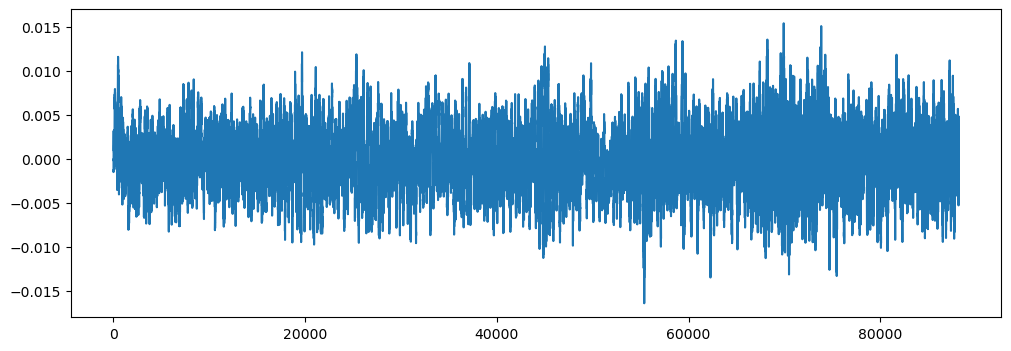

In [23]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [24]:
wave_sample_rate,wave_audio=wav.read(audio_file_path) #Here the audio is in 2-Dimension/2-channel/stereo

In [25]:
wave_audio

array([[-37, -77],
       [-38, -69],
       [-24, -65],
       ...,
       [221,  50],
       [203,  96],
       [161, 145]], dtype=int16)

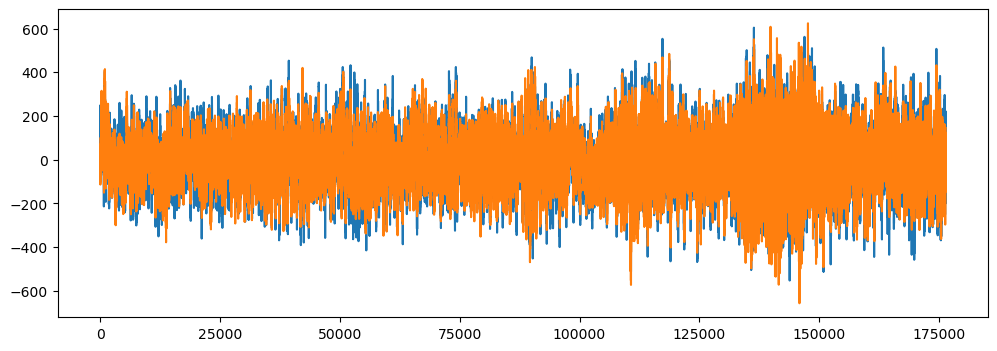

In [26]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

***Extract Features***
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [28]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_audio_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [29]:
mfccs

array([[-5.2621802e+02, -4.9162549e+02, -4.9158844e+02, ...,
        -4.6224631e+02, -4.6089438e+02, -4.7240543e+02],
       [ 1.1467383e+02,  1.1573990e+02,  1.1539533e+02, ...,
         1.1611288e+02,  1.1409660e+02,  9.9294205e+01],
       [-8.5976458e+00, -1.6406879e+01, -2.2357391e+01, ...,
        -3.4103214e+01, -3.3279194e+01, -2.9676945e+01],
       ...,
       [ 5.5810471e+00,  7.8203020e+00,  6.9139447e+00, ...,
        -2.7477770e+00, -9.0716583e-01,  3.9232457e+00],
       [ 1.6305037e+00, -3.8014741e+00, -5.0561752e+00, ...,
        -5.4207706e+00, -3.4282446e-02,  3.7111681e+00],
       [ 3.6884837e+00,  2.7236998e-01,  7.3981690e-01, ...,
        -9.1370239e+00, -8.5052586e+00, -2.6696153e+00]], dtype=float32)

In [30]:
import os

audio_dataset_path='UrbanSound8K/audio/'
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [31]:
def feature_extractor(file):
    audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfccs_feature=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_feature=np.mean(mfccs_feature.T,axis=0)
    return mfccs_scaled_feature

In [32]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [09:15,  6.83it/s]C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [20:54, 10.96it/s]C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [21:44,  6.69it/s]


In [33]:
#Converting extracted_feature to pandas dataframe
extracted_feature_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_feature_df.head()

,features,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [95]:
#Split the data into independent and dependent feature
x=np.array(extracted_feature_df['features'].tolist())
y_set=np.array(extracted_feature_df['class'].tolist())

In [97]:
x.shape

(8732, 40)

In [99]:
#Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y_set))
from sklearn.preprocessing import LabelBinarizer


In [101]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [103]:
y.shape

(8732, 10)

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [106]:
x_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459423e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009264e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [109]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [110]:
x_train.shape

(6985, 40)

In [111]:
x_test.shape

(1747, 40)

In [112]:
y_test.shape

(1747, 10)

In [116]:
y_train.shape

(6985, 10)

**Model Creation**

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:
num_labels=y.shape[1]

In [49]:
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200,activation='relu'))

#Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,610 (334.41 KB)

 Trainable params: 85,610 (334.41 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [52]:
#training model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs=100
num_batch_size=32
checkpointer=ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1,save_best_only=True) ##For saving model
start=datetime.now()

model.fit(x_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(x_test,y_test),verbose=1)
duration=datetime.now()-start
print('Training completed in time:',duration)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.1163 - loss: 11.0891 - val_accuracy: 0.1088 - val_loss: 2.2871
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1109 - loss: 2.2969 - val_accuracy: 0.1145 - val_loss: 2.2730
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1124 - loss: 2.2723 - val_accuracy: 0.1580 - val_loss: 2.2091
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1352 - loss: 2.2331 - val_accuracy: 0.1631 - val_loss: 2.1512
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1430 - loss: 2.1897 - val_accuracy: 0.1654 - val_loss: 2.1383
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1519 - loss: 2.1868 - val_accuracy: 0.1540 - val_loss: 2.1263
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1628 - loss: 2.1627 - val_accuracy: 0.1826 - val_loss: 2.1058
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1677 - loss: 2.1435 - val_ac

In [53]:
test_accuracy=model.evaluate(x_test,y_test,verbose=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7528 - loss: 0.8211


In [54]:
print(test_accuracy)

[0.7686167359352112, 0.7567257881164551]


In [55]:
filename='UrbanSound8K/dog_bark.wav'
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict=model.predict(prediction_feature)
classes=np.argmax(predict,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


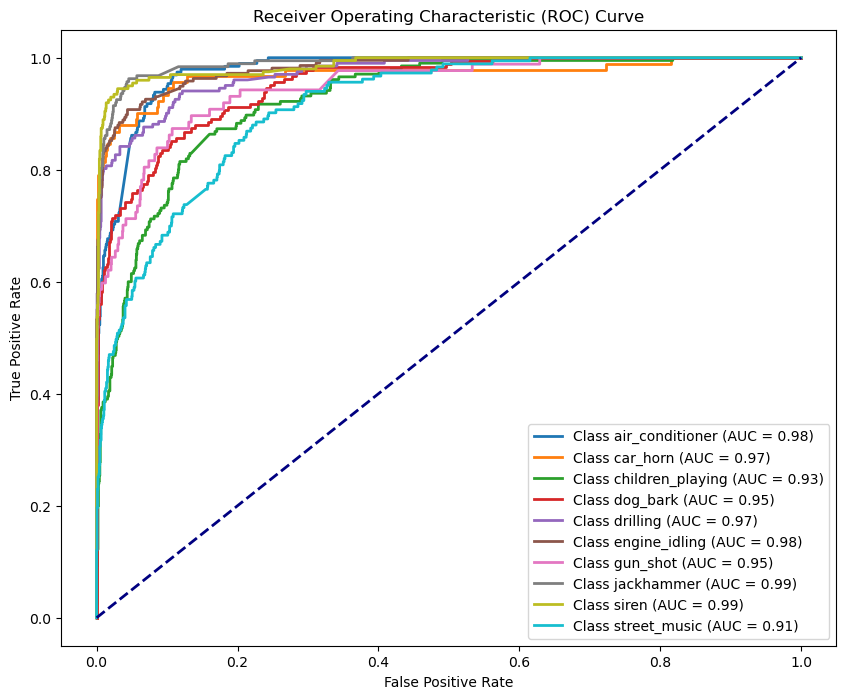

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [124]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels_encoded = lb.fit_transform(y_set)

y_pred_proba = model.predict(x_test)
fpr, tpr, roc_auc = {}, {}, {}

for i in range(y_pred_proba.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(10, 8))

for i in range(y_pred_proba.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

y_pred_proba = model.predict(x_test)


In [130]:
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

<IPython.core.display.Javascript object>

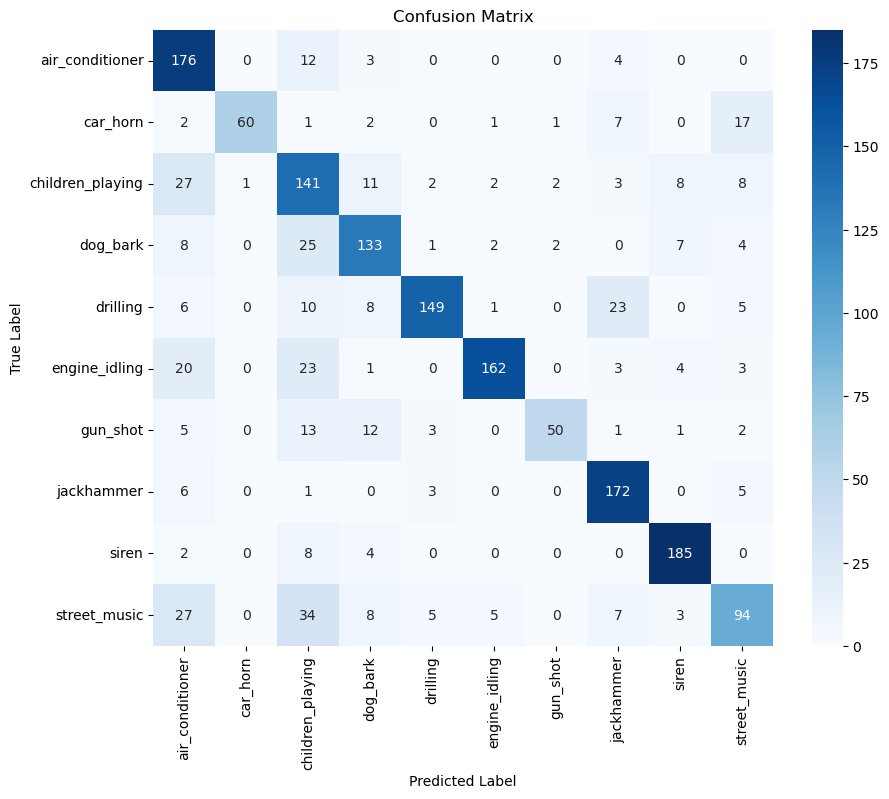

In [132]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [136]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)

print("Precision for each class:", precision)
print("Recall for each class:", recall)

Precision for each class: [0.63082437 0.98360656 0.5261194  0.73076923 0.91411043 0.93641618
 0.90909091 0.78181818 0.88942308 0.68115942]
Recall for each class: [0.9025641  0.65934066 0.68780488 0.73076923 0.73762376 0.75
 0.57471264 0.9197861  0.92964824 0.5136612 ]


In [138]:
class_report = classification_report(y_true_classes, y_pred_classes, target_names=lb.classes_)
print(class_report)

                  precision    recall  f1-score   support

 air_conditioner       0.63      0.90      0.74       195
        car_horn       0.98      0.66      0.79        91
children_playing       0.53      0.69      0.60       205
        dog_bark       0.73      0.73      0.73       182
        drilling       0.91      0.74      0.82       202
   engine_idling       0.94      0.75      0.83       216
        gun_shot       0.91      0.57      0.70        87
      jackhammer       0.78      0.92      0.85       187
           siren       0.89      0.93      0.91       199
    street_music       0.68      0.51      0.59       183

        accuracy                           0.76      1747
       macro avg       0.80      0.74      0.76      1747
    weighted avg       0.78      0.76      0.76      1747



In [56]:
classes

array([3], dtype=int64)

In [57]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [58]:
classes=labelencoder.inverse_transform(classes)

In [59]:
classes

array(['dog_bark'], dtype='<U16')

In [60]:
filename='UrbanSound8K/engine.wav'
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict=model.predict(prediction_feature)
classes=np.argmax(predict,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [61]:
classes=labelencoder.inverse_transform(classes)

In [62]:
classes

array(['engine_idling'], dtype='<U16')

In [63]:
filename='UrbanSound8K/children_playing.wav'
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict=model.predict(prediction_feature)
classes=np.argmax(predict,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [64]:
classes=labelencoder.inverse_transform(classes)
classes

array(['children_playing'], dtype='<U16')

In [65]:
filename='UrbanSound8K/drilling.wav'
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict=model.predict(prediction_feature)
classes=np.argmax(predict,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [66]:
classes=labelencoder.inverse_transform(classes)
classes

array(['jackhammer'], dtype='<U16')

In [67]:
filename='UrbanSound8K/28385-9-0-32.wav'
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict=model.predict(prediction_feature)
classes=np.argmax(predict,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [68]:
classes=labelencoder.inverse_transform(classes)
classes

array(['street_music'], dtype='<U16')